# Style Transfer &mdash; TensorFlow 2.x

**Mark Wilber**

Converted to TensorFlow 2.x to run on GPU dev box.

Uses style transfer technique to synthesize paintings in the style of Bonnie Wilber from photographs

Borrows heavily from Walid Ahmad's [Making AI Art with Style Transfer using Keras](https://medium.com/mlreview/making-ai-art-with-style-transfer-using-keras-8bb5fa44b216)

<font color='darkgreen'>**As thise notebook is lengthy, readers will find it much easier to navigate with [Jupyter Nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) installed, and Table of Contents (2) selected:**</font>

## Preliminaries

**Next two lines are useful in the event of external code changes.**

In [1]:
%load_ext autoreload
%autoreload 2

### Python imports

**Next two lines are for pretty output for all prints in a Pandas cell, not just the last.**

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**`DataSci` contains generally helpful data science stuff, while `plotHelpers` includes plot functions specifically.**

In [3]:
import sys
# sys.path.append('/home/wilber/work/Mlib')
# from utility import DataSci as util
# import plotHelpers as ph

In [4]:
# import tensorflow as tf
# print(tf.image)

In [5]:
from time import time, asctime, gmtime
print(asctime(gmtime()))

t0 = time()

# from platform import node
import os
from os.path import exists
# import shutil
# from glob import glob
# from random import random
# from collections import Counter, OrderedDict
# import gc		# garbage collection module
# import pprint
# import pickle
# import timeit

print("Python version: ", sys.version_info[:])
print("\nUn-versioned imports:")
if 'sys' in sys.modules:
    print('sys', end="")
if 'utility' in sys.modules:
    print(', utility', end="")
if 'plotHelpers' in sys.modules:
    print(', plotHelpers', end="")
if 'platform' in sys.modules:
    print(', platform', end="")
if 'os' in sys.modules:
    print(', os', end="")
if 'os.path' in sys.modules:
    print(', os.path', end="")
if 'shutil' in sys.modules:
    print(', shutil', end="")
if 'glob' in sys.modules:
    print(', glob', end="")
if 'random' in sys.modules:
    print(', random', end="")
if 'collections' in sys.modules:
    print(', collections', end="")
if 'gc' in sys.modules:
    print(', gc', end="")
if 'pprint' in sys.modules:
    print(', pprint', end="")
if 'pickle' in sys.modules:
    print(', pickle', end="")
if 'timeit' in sys.modules:
    print(', timeit', end="")

import dateutil as du
# from dateutil.parser import parse
import numpy as np
# import pandas as pd
# import pyreadr

from scipy import __version__ as scVersion
# import scipy.sparse as sp
from scipy.optimize import fmin_l_bfgs_b

kerVersion = None
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# from keras import backend as K, __version__ as kerVersion
# from keras.applications.vgg16 import preprocess_input
# from keras.applications import VGG16
# from keras.preprocessing.image import load_img, img_to_array
# from keras.layers import Input

# import tensorflow as tf
from tensorflow import __version__ as tfVersion
# from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import Input, Model, models
from tensorflow import (add_n, cast, clip_by_value, constant, float32, function,
                        GradientTape, int32, io,  linalg, newaxis,
                        optimizers, reduce_mean, shape, squeeze, Variable)
from tensorflow import image as tfImage

from PIL import Image as ImagePIL, __version__ as pilVersion

# from joblib import __version__ as jlVersion
# from joblib import dump, load

# import seaborn as sns
# import colorcet as cc
from matplotlib import __version__ as mpVersion
import matplotlib.pyplot as plt

ipVersion = None
from IPython import display, __version__ as ipVersion

print("\n")
if 'colorcet' in sys.modules:
    print("colorcet: {0}".format(cc.__version__), end="   ")
if 'dateutil' in sys.modules:
    print("dateutil: {0}".format(du.__version__), end="   ")
if 'IPython' in sys.modules:
    print(f"IPython: {ipVersion}", end="   ")
if 'joblib' in sys.modules:
    print("joblib: {0}".format(jlVersion), end="   ")
if 'keras' in sys.modules:
    print("keras: {0}".format(kerVersion), end="   ")
if 'matplotlib' in sys.modules:
    print("matplotlib: {0}".format(mpVersion), end="   ")
if 'numpy' in sys.modules:
    print("numpy: {0}".format(np.__version__), end="   ")
# if 'pandas' in sys.modules:
#     print("pandas: {0}".format(pd.__version__), end="   ")
if 'PIL' in sys.modules:
    print("PIL: {0}".format(pilVersion), end="   ")
if 'pyreader' in sys.modules:
    print("pyreader: {0}".format(pyreader.__version__), end="   ")
if 'seaborn' in sys.modules:
    print("seaborn: {0}".format(sns.__version__), end="   ")
if 'scipy' in sys.modules:
    print("scipy: {0}".format(scVersion), end="   ")
if 'sklearn' in sys.modules:
    print("sklearn: {0}".format(skVersion), end="   ")
if 'tensorflow' in sys.modules:
    print("tensorflow: {0}".format(tfVersion), end="")
# if '' in sys.modules:
#     print(": {0}".format(.__version__), end="  ")
Δt = time() - t0
print(f"\n\nΔt: {Δt: 4.1f}s.")

%matplotlib inline

Wed Apr 22 06:17:49 2020
Python version:  (3, 6, 9, 'final', 0)

Un-versioned imports:
sys, platform, os, os.path, shutil, glob, random, collections, gc, pprint, pickle, timeit

dateutil: 2.8.1   IPython: 7.12.0   matplotlib: 3.1.3   numpy: 1.18.1   PIL: 5.1.0   scipy: 1.4.1   tensorflow: 2.1.0

Δt:  1.6s.


**Verify that TensorFlow is finding the GPU**

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15503748012612569737
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9349617452595729033
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6157273820100683755
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13194004234618052028
physical_device_desc: "device: XLA_GPU device"
]


### Helper functions

#### `loadImg()`

In [7]:
def loadImg(pathToImage):
  maxDim = 512
  img = io.read_file(pathToImage)
  img = tfImage.decode_image(img, channels=3)
  img = tfImage.convert_image_dtype(img, float32)

  myShape = cast(shape(img)[:-1], float32)
  longDim = max(myShape)
  scale = maxDim/longDim

  newShape = cast(myShape*scale, int32)

  img = tfImage.resize(img, newShape)
  img = img[newaxis, :]
  return img

#### `imShow()`

In [8]:
def imShow(myImage, title=None, ax=None):
    if len(myImage.shape) > 3:
        myImage = squeeze(myImage, axis=0)

    if ax is None:
        plt.imshow(myImage)
    else:
        ax.imshow(myImage)

    if title:
        plt.title(title)

#### `tensorToImage()`

In [9]:
def tensorToImage(tensor, targetSize=(255, 255)):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]

    return ImagePIL.fromarray(tensor).resize(targetSize)

#### `getFeatureRepresentations()`

In [10]:
def getFeatureRepresentations(x, layerNames, model):
    """
    Get feature representations of input x for one or more layers in a given model.
    """
    featMatrices = []
    for ln in layerNames:
        selectedLayer = model.get_layer(ln)
        featRaw = selectedLayer.output
        featRawShape = K.shape(featRaw).eval(session=tf_session)
        N_l = featRawShape[-1]
        M_l = featRawShape[1]*featRawShape[2]
        featMatrix = K.reshape(featRaw, (M_l, N_l))
        featMatrix = K.transpose(featMatrix)
        featMatrices.append(featMatrix)
    return featMatrices

#### `extractLayerValuesFromModel()`

In [11]:
def extractLayerValuesFromModel(layerNames):
    """
    Creates a vgg model that returns a list of intermediate output values.
    """

    # Load our model. Load pretrained VGG, trained on imagenet data
    vgg = VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layerNames]

    model = Model([vgg.input], outputs)
    return model

#### `GramMatrix()`

In [12]:
def GramMatrix(F):
    result = linalg.einsum('bijc,bijd->bcd', F, F)
    inputShape = shape(F)
    locationCt = cast(inputShape[1]*inputShape[2], float32)

    return result/(locationCt)

#### `StyleContentModel()`

**Build a model that returns the style and content tensors**

In [13]:
class StyleContentModel(models.Model):

    def __init__(self, styleLayers, contentLayers):
        super(StyleContentModel, self).__init__()
        self.vgg =  extractLayerValuesFromModel(styleLayers + contentLayers)
        self.styleLayers = styleLayers
        self.contentLayers = contentLayers
        self.styleLayersLen = len(styleLayers)
        self.vgg.trainable = False

    def call(self, inputs):
        "Expects float input in [0,1]"
        inputs = inputs*255.0
        preprocessedInput = preprocess_input(inputs)
        outputs = self.vgg(preprocessedInput)
        styleOutputs, contentOutputs = (outputs[:self.styleLayersLen], 
                                          outputs[self.styleLayersLen:])

        styleOutputs = [GramMatrix(styleOutput)
                         for styleOutput in styleOutputs]

        contentDict = {contentName:value 
                        for contentName, value 
                        in zip(self.contentLayers, contentOutputs)}

        styleDict = {styleName:value
                      for styleName, value
                      in zip(self.styleLayers, styleOutputs)}

        return {'content': contentDict, 'style': styleDict}

#### `clipImage01()`

In [14]:
def clipImage01(myImage):
    return clip_by_value(myImage, clip_value_min=0.0, clip_value_max=1.0)

#### `styleContentLoss()`

In [15]:
def styleContentLoss(outputs):
    styleOutputs = outputs['style']
    contentOutputs = outputs['content']
    styleLoss = add_n([reduce_mean((styleOutputs[name] - styleTargets[name])**2)
                       for name in styleOutputs.keys()])
    styleLoss *= styleWeight / styleLayerCt

    contentLoss = add_n([reduce_mean((contentOutputs[name] - contentTargets[name])**2) 
                         for name in contentOutputs.keys()])
    contentLoss *= contentWeight / contentLayerCt
    loss = styleLoss + contentLoss
    return loss

#### `trainStep()`

In [16]:
@function()
def trainStep(myImage):
    with GradientTape() as tape:
        outputs = extractor(myImage)
        loss = styleContentLoss(outputs)
        loss += totalVariationWeight*tfImage.total_variation(myImage)

    grad = tape.gradient(loss, myImage)
    opt.apply_gradients([(grad, myImage)])
    myImage.assign(clipImage01(myImage))

#### `getContentLoss()`

In [17]:
# def getContentLoss(F, P):
#     cLoss = 0.5*K.sum(K.square(F - P))
#     return cLoss

#### `getStyleLoss()`

In [18]:
# def getStyleLoss(ws, Gs, As):
#     sLoss = K.variable(0.)
#     for w, G, A in zip(ws, Gs, As):
#         M_l = K.int_shape(G)[1]
#         N_l = K.int_shape(G)[0]
#         G_gram = GramMatrix(G)
#         A_gram = GramMatrix(A)
#         sLoss+= w*0.25*K.sum(K.square(G_gram - A_gram))/ (N_l**2 * M_l**2)
#     return sLoss

#### `getTotalLoss()`

In [19]:
# def getTotalLoss(gImPlaceholder, alpha=1.0, beta=1000.0):
#     F = getFeatureRepresentations(gImPlaceholder, layer_names=[contentLayerName], model=generatedModel)[0]
#     Gs = getFeatureRepresentations(gImPlaceholder, layer_names=styleLayerNames, model=generatedModel)
#     contentLoss = getContentLoss(F, P)
#     styleLoss = getStyleLoss(ws, Gs, As)
#     totalLoss = alpha*contentLoss + beta*styleLoss
#     return totalLoss

#### `calculateLoss()`

In [20]:
# def calculateLoss(gImArr):
#     """
#     Calculate total loss using K.function
#     """
#     if gImArr.shape != (1, targetWidth, targetWidth, 3):
#         gImArr = gImArr.reshape((1, targetWidth, targetHeight, 3))
#     loss_fcn = K.function([generatedModel.input], [getTotalLoss(generatedModel.input)])
#     return loss_fcn([gImArr])[0].astype('float64')

#### `getGrad()`

In [21]:
# def getGrad(gImArr):
#     """
#     Calculate the gradient of the loss function with respect to the generated image
#     """
#     if gImArr.shape != (1, targetWidth, targetHeight, 3):
#         gImArr = gImArr.reshape((1, targetWidth, targetHeight, 3))
#     grad_fcn = K.function([generatedModel.input], 
#                           K.gradients(getTotalLoss(generatedModel.input), [generatedModel.input]))
#     grad = grad_fcn([gImArr])[0].flatten().astype('float64')
#     return grad

#### `postProcessArray()`

In [22]:
# def postProcessArray(x):
#     # Zero-center by mean pixel
#     if x.shape != (targetWidth, targetHeight, 3):
#         x = x.reshape((targetWidth, targetHeight, 3))
#     x[..., 0] += 103.939
#     x[..., 1] += 116.779
#     x[..., 2] += 123.68
#     # 'BGR'->'RGB'
#     x = x[..., ::-1]
#     x = np.clip(x, 0, 255)
#     x = x.astype('uint8')
#     return x

#### `reprocessArray()`

In [23]:
# def reprocessArray(x):
#     x = np.expand_dims(x.astype('float64'), axis=0)
#     x = preprocess_input(x)
#     return x

#### `saveOriginalSize()`

In [24]:
# def saveOriginalSize(x, targetSize):
#     xIm = Image.fromarray(x)
#     xIm = xIm.resize(targetSize)
#     xIm.save(targetImagePath)
#     return xIm

## Use VGG19 model

### Load VGG19 model without the classification head, and list the layer names

In [33]:
vgg = VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)


input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [34]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Specify layer names used in loss calculations

In [35]:
contentLayerNames = ['block5_conv2']
styleLayerNames = [
                   'block1_conv1',
                   'block2_conv1',
                   'block3_conv1',
                   'block4_conv1',
                   'block5_conv1'
                  ]
contentLayerCt = len(contentLayerNames)
styleLayerCt = len(styleLayerNames)

### Validate `extractLayerValuesFromModel()`

In [36]:
styleExtractor = extractLayerValuesFromModel(styleLayerNames)
styleOutputs = styleExtractor(styleImage*255)

#Look at the statistics of each layer's output
for name, output in zip(styleLayerNames, styleOutputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 512, 512, 64)
  min:  0.0
  max:  844.9168
  mean:  28.442476

block2_conv1
  shape:  (1, 256, 256, 128)
  min:  0.0
  max:  3484.4949
  mean:  162.39307

block3_conv1
  shape:  (1, 128, 128, 256)
  min:  0.0
  max:  9056.637
  mean:  154.66115

block4_conv1
  shape:  (1, 64, 64, 512)
  min:  0.0
  max:  19861.676
  mean:  620.3287

block5_conv1
  shape:  (1, 32, 32, 512)
  min:  0.0
  max:  2632.084
  mean:  46.237953



### Set parameters

In [28]:
targetWidth = 512
targetHeight = 512

learningRate = 0.02
β1 = 0.99
ε = 1e-1

styleWeight = 1.0e-2
contentWeight = 1.0e4

totalVariationWeight = 30

## Load images

* style: Renoir's *The Two Sisters on the Terrace*
* content: Portrait of a Man Hugging a Happy Woman Under an Umbrella

### Content image (a photo)

In [25]:
targetSize = (targetHeight, targetWidth)

contentImagePath = './images/PortraitOfManHuggingHappyWomanUnderUmbrella512x512.png'

contentImage = loadImg(contentImagePath)
# contentImageOrig = Image.open(contentImagePath)
# contentImageSizeOrig = contentImageOrig.size
# contentImage = load_img(path=contentImagePath, target_size=targetSize)
# contentImageArr = img_to_array(contentImage)
# contentImageArr = K.variable(preprocess_input(np.expand_dims(contentImageArr, axis=0)), dtype='float32')

### Style image (Auguste Renoir painting *The Two Sisters on the Terrace*)

In [26]:
styleImagePath = './images/1024pxRenoirPierre-AugusteTheTwoSistersOnTheTerrace512x512.png'

styleImage = loadImg(styleImagePath)  #, target_size=targetSize)
# styleImageArr = img_to_array(styleImage)
# styleImageArr = K.variable(preprocess_input(np.expand_dims(styleImageArr, axis=0)), dtype='float32')

#### Show the images

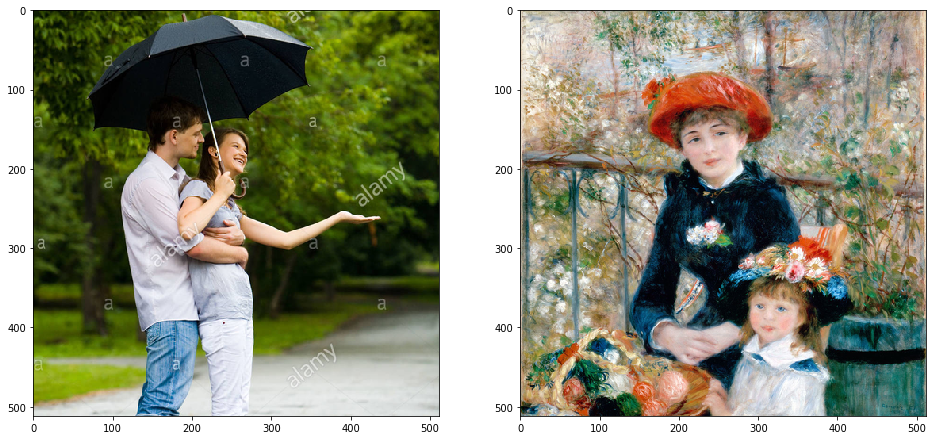

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
imShow(contentImage, ax=axes[0])
imShow(styleImage, ax=axes[1])

## Use VGG19 model to preprocess images, validate training weights

### Preprocess content image for VGG19 model

In [29]:
x0 = preprocess_input(contentImage*255)
x0 = tfImage.resize(x0, (224, 224))
vgg = VGG19(include_top=True, weights='imagenet')
prediction_probabilities0 = vgg(x0)
prediction_probabilities0.shape

TensorShape([1, 1000])

#### Test VGG19 model's classification of the content image

In [30]:
predicted_top_5 = decode_predictions(prediction_probabilities0.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('umbrella', 0.99983335),
 ('mortarboard', 3.2733016e-05),
 ('flute', 2.9513694e-05),
 ('parachute', 1.4538659e-05),
 ('bow', 1.4524538e-05)]

### Preprocess style image for VGG19 model

In [31]:
x1 = preprocess_input(styleImage*255)
x1 = tfImage.resize(x1, (224, 224))
vgg = VGG19(include_top=True, weights='imagenet')
prediction_probabilities1 = vgg(x1)
prediction_probabilities1.shape

TensorShape([1, 1000])

#### Test VGG19 model's classification of the content image

In [32]:
predicted_top_5 = decode_predictions(prediction_probabilities1.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('bonnet', 0.3699675),
 ('hoopskirt', 0.10775862),
 ('cowboy_hat', 0.056142375),
 ('shower_cap', 0.040267028),
 ('sombrero', 0.038349923)]

### Extract style and content from model

In [37]:
extractor = StyleContentModel(styleLayerNames, contentLayerNames)

results = extractor(constant(contentImage))

style_results = results['style']

print('Styles:')
for name, output in sorted(results['style'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())
    print()

print("Contents:")
for name, output in sorted(results['content'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.017298685
    max:  28687.215
    mean:  512.953

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  73969.41
    mean:  13893.292

   block3_conv1
    shape:  (1, 256, 256)
    min:  1.1532089
    max:  757058.44
    mean:  15628.128

   block4_conv1
    shape:  (1, 512, 512)
    min:  10.127817
    max:  7348456.0
    mean:  212889.52

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  100683.33
    mean:  1777.3712

Contents:
   block5_conv2
    shape:  (1, 32, 32, 512)
    min:  0.0
    max:  1601.8628
    mean:  15.988835


## Run gradient descent

### Set style and content target values

In [38]:
styleTargets = extractor(styleImage)['style']
contentTargets = extractor(contentImage)['content']

### Define the optimizer

In [39]:
opt = optimizers.Adam(learning_rate=learningRate, beta_1=β1, epsilon=ε)

### Create a container for the image to optimize

In [40]:
targetImage = np.random.randint(256, size=(1, targetWidth, targetHeight, 3)).astype('float32')
print(contentImage.shape)
imageContainer = Variable(contentImage)
# print(targetImage.shape)
# imageContainer = Variable(targetImage)

(1, 512, 512, 3)


#### test `trainStep()`

* Run it a few steps to see if it is OK

........


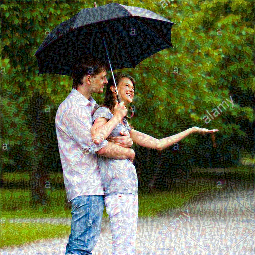

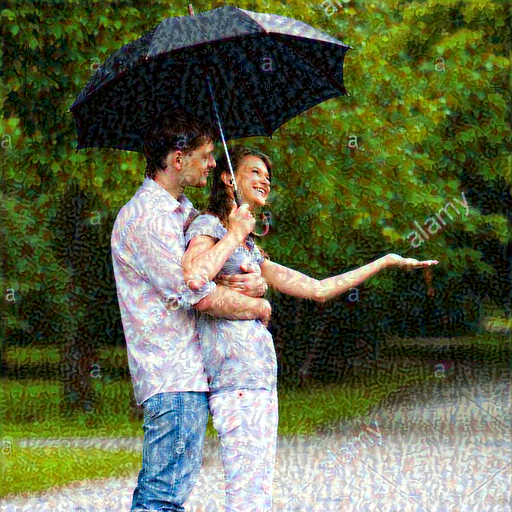

In [41]:
for i in range(8):
    trainStep(imageContainer)
    print('.', end="")
print()
tensorToImage(imageContainer)
imageNow = tensorToImage(imageContainer, targetSize=targetSize)
display.display(imageNow)
totalSteps = 3
targetImagePath = f"output{totalSteps:04d}.png"
imageNow.save(targetImagePath)

#### Set random seeds to enforce consistent results

This is described in more detail in Jason Brownlee's [How to Get Reproducible Results with Keras](https://machinelearningmastery.com/reproducible-results-neural-networks-keras/)

**Note: this will not necessarily work when running on GPUs.**

2 Steps:
1. Set `numpy`'s random number generator seed, since Keras itself relies on this
1. Set TensorFlow's random number generator seed, as this is invoked by TF's random number generators.

In [42]:
from numpy.random import seed
seed(3)

from tensorflow import random
random.set_seed(4)

In [45]:
imageContainer = Variable(contentImage)

factors = np.linspace(1, 28, 30)
printSteps = [int(k**2.4891) for k in factors]
# printSteps = [1, 6, 13, 25, 50, 100, 150, 210, 290, 400, 550, 750, 1100]
print(printSteps)

[1, 5, 13, 27, 47, 74, 109, 151, 202, 262, 332, 412, 503, 604, 716, 841, 977, 1126, 1287, 1462, 1650, 1852, 2068, 2299, 2544, 2804, 3079, 3370, 3677, 4000]


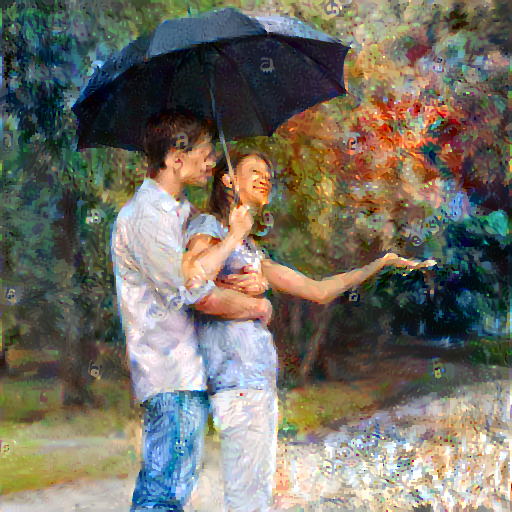


Train step: 4000


In [44]:
epochs = 1100

imageContainer = Variable(contentImage)

for n in range(max(printSteps) + 1):
    trainStep(imageContainer)
    print(".", end='')
    if n in printSteps:
        display.clear_output(wait=True)
        imageNow = tensorToImage(imageContainer, targetSize=targetSize)
        display.display(imageNow)
        targetImagePath = f"outImage{n:04d}.png"
        imageNow.save(targetImagePath)
        print(f"\nTrain step: {n}")

## Load images

* style: Renoir's *The Two Sisters on the Terrace*
* content: Fly fishing in a lake with reflected mountain

### Content image (a photo)

In [46]:
targetSize = (targetHeight, targetWidth)

contentImagePath = './images/FishingInLake512x512.png'

contentImage = loadImg(contentImagePath)
# contentImageOrig = Image.open(contentImagePath)
# contentImageSizeOrig = contentImageOrig.size
# contentImage = load_img(path=contentImagePath, target_size=targetSize)
# contentImageArr = img_to_array(contentImage)
# contentImageArr = K.variable(preprocess_input(np.expand_dims(contentImageArr, axis=0)), dtype='float32')

NotFoundError: ./images/FishingInLake512x512.png; No such file or directory [Op:ReadFile]

### Style image (Auguste Renoir painting *The Two Sisters on the Terrace*)

In [26]:
styleImagePath = './images/1024pxRenoirPierre-AugusteTheTwoSistersOnTheTerrace512x512.png'

styleImage = loadImg(styleImagePath)  #, target_size=targetSize)
# styleImageArr = img_to_array(styleImage)
# styleImageArr = K.variable(preprocess_input(np.expand_dims(styleImageArr, axis=0)), dtype='float32')

#### Show the images

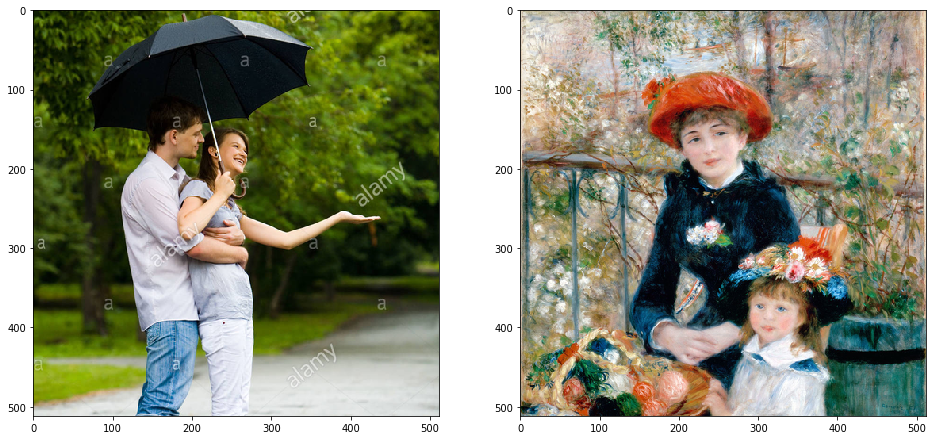

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
imShow(contentImage, ax=axes[0])
imShow(styleImage, ax=axes[1])

## Use VGG19 model to preprocess images, validate training weights

### Preprocess content image for VGG19 model

In [29]:
x0 = preprocess_input(contentImage*255)
x0 = tfImage.resize(x0, (224, 224))
vgg = VGG19(include_top=True, weights='imagenet')
prediction_probabilities0 = vgg(x0)
prediction_probabilities0.shape

TensorShape([1, 1000])

#### Test VGG19 model's classification of the content image

In [30]:
predicted_top_5 = decode_predictions(prediction_probabilities0.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('umbrella', 0.99983335),
 ('mortarboard', 3.2733016e-05),
 ('flute', 2.9513694e-05),
 ('parachute', 1.4538659e-05),
 ('bow', 1.4524538e-05)]

### Preprocess style image for VGG19 model

In [31]:
x1 = preprocess_input(styleImage*255)
x1 = tfImage.resize(x1, (224, 224))
vgg = VGG19(include_top=True, weights='imagenet')
prediction_probabilities1 = vgg(x1)
prediction_probabilities1.shape

TensorShape([1, 1000])

#### Test VGG19 model's classification of the content image

In [32]:
predicted_top_5 = decode_predictions(prediction_probabilities1.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('bonnet', 0.3699675),
 ('hoopskirt', 0.10775862),
 ('cowboy_hat', 0.056142375),
 ('shower_cap', 0.040267028),
 ('sombrero', 0.038349923)]

### Extract style and content from model

In [37]:
extractor = StyleContentModel(styleLayerNames, contentLayerNames)

results = extractor(constant(contentImage))

style_results = results['style']

print('Styles:')
for name, output in sorted(results['style'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())
    print()

print("Contents:")
for name, output in sorted(results['content'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.017298685
    max:  28687.215
    mean:  512.953

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  73969.41
    mean:  13893.292

   block3_conv1
    shape:  (1, 256, 256)
    min:  1.1532089
    max:  757058.44
    mean:  15628.128

   block4_conv1
    shape:  (1, 512, 512)
    min:  10.127817
    max:  7348456.0
    mean:  212889.52

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  100683.33
    mean:  1777.3712

Contents:
   block5_conv2
    shape:  (1, 32, 32, 512)
    min:  0.0
    max:  1601.8628
    mean:  15.988835


## Run gradient descent

### Set style and content target values

In [38]:
styleTargets = extractor(styleImage)['style']
contentTargets = extractor(contentImage)['content']

### Define the optimizer

In [39]:
opt = optimizers.Adam(learning_rate=learningRate, beta_1=β1, epsilon=ε)

### Create a container for the image to optimize

In [40]:
targetImage = np.random.randint(256, size=(1, targetWidth, targetHeight, 3)).astype('float32')
print(contentImage.shape)
imageContainer = Variable(contentImage)
# print(targetImage.shape)
# imageContainer = Variable(targetImage)

(1, 512, 512, 3)


#### Set random seeds to enforce consistent results

This is described in more detail in Jason Brownlee's [How to Get Reproducible Results with Keras](https://machinelearningmastery.com/reproducible-results-neural-networks-keras/)

**Note: this will not necessarily work when running on GPUs.**

2 Steps:
1. Set `numpy`'s random number generator seed, since Keras itself relies on this
1. Set TensorFlow's random number generator seed, as this is invoked by TF's random number generators.

In [42]:
from numpy.random import seed
seed(3)

from tensorflow import random
random.set_seed(4)

In [ ]:
imageContainer = Variable(contentImage)

factors = np.linspace(1, 28, 30)
printSteps = [int(k**2.4891) for k in factors]
# printSteps = [1, 6, 13, 25, 50, 100, 150, 210, 290, 400, 550, 750, 1100]
print(printSteps)

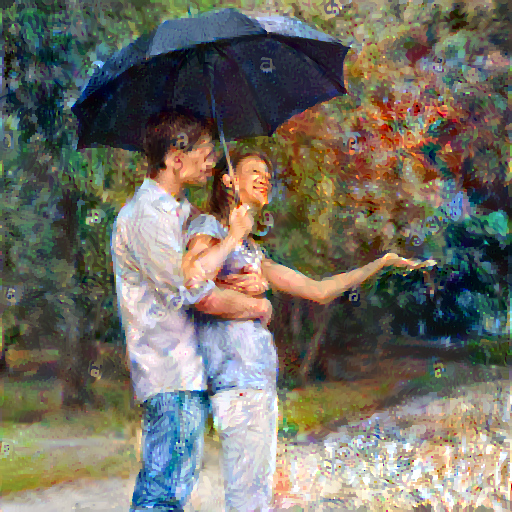


Train step: 2068
...........................................................................................................................................................................

In [ ]:
epochs = 1100

imageContainer = Variable(contentImage)

for n in range(max(printSteps) + 1):
    trainStep(imageContainer)
    print(".", end='')
    if n in printSteps:
        display.clear_output(wait=True)
        imageNow = tensorToImage(imageContainer, targetSize=targetSize)
        display.display(imageNow)
        targetImagePath = f"outImage{n:04d}.png"
        imageNow.save(targetImagePath)
        print(f"\nTrain step: {n}")